In [1]:
pip install pgmpy

In [2]:
pip install networkx

In [3]:
pip install pydot

In [0]:
from pgmpy.models import BayesianModel

bayesianModel = BayesianModel([('bronc','dysp'),('either','dysp'),('either','xray'),('smoke','bronc'),('smoke','lung'),('tub','either'),('lung','either'),('asia','tub')])

In [0]:
from pgmpy.factors.discrete import TabularCPD

cpd_asia = TabularCPD(variable='asia', variable_card=2, values=[[.01],[.99]])

cpd_smoke = TabularCPD(variable='smoke', variable_card=2, values=[[.5],[.5]])

cpd_tub = TabularCPD(variable='tub', variable_card=2, values=[[.05,.01],[.95,.99]], evidence=['asia'], evidence_card=[2])

cpd_tub = TabularCPD(variable='tub', variable_card=2, values=[[.05,.01],[.95,.99]], evidence=['asia'], evidence_card=[2])

cpd_lung = TabularCPD(variable='lung', variable_card=2, values=[[.1,.01],[.9,.99]], evidence=['smoke'], evidence_card=[2])

cpd_either = TabularCPD(variable='either', variable_card=2, values=[[1,1,1,0],[0,0,0,1]], evidence=['lung','tub'], evidence_card=[2,2])

cpd_bronc = TabularCPD(variable='bronc', variable_card=2, values=[[.6,.3],[.4,.7]], evidence=['smoke'], evidence_card=[2])

cpd_xray = TabularCPD(variable='xray', variable_card=2, values=[[.98,.05],[.02,.95]], evidence=['either'], evidence_card=[2])

cpd_dysp = TabularCPD(variable='dysp', variable_card=2, values=[[.9,.7,.8,.1],[.1,.3,.2,.9]], evidence=['bronc','either'], evidence_card=[2,2])

In [0]:
bayesianModel.add_cpds(cpd_asia, cpd_smoke, cpd_tub, cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)

In [7]:
for cpd in bayesianModel.get_cpds():
    print("\nCPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of asia:
+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+

CPD of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+

CPD of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+

CPD of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+

CPD of bronc:
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+

CPD of either:
+-----------+---------+

In [30]:
from pgmpy.inference import VariableElimination

bayesian_inference = VariableElimination(bayesianModel)
joint_probability = bayesian_inference.query(variables=['tub','lung','bronc'],
                               evidence={'asia':0,'xray':0},joint=True)

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 239.81it/s]


In [31]:
print(joint_probability)  

+---------+----------+--------+-----------------------+
| lung    | bronc    | tub    |   phi(lung,bronc,tub) |
+=========+==========+========+=======================+
| lung(0) | bronc(0) | tub(0) |                0.0106 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(0) | tub(1) |                0.2021 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(1) | tub(0) |                0.0079 |
+---------+----------+--------+-----------------------+
| lung(0) | bronc(1) | tub(1) |                0.1508 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(0) | tub(0) |                0.1413 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(0) | tub(1) |                0.1370 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(1) | tub(0) |                0.1778 |
+---------+----------+--------+-----------------------+
| lung(1) | bronc(1) | tub(1) |                0

The moral graph is given below

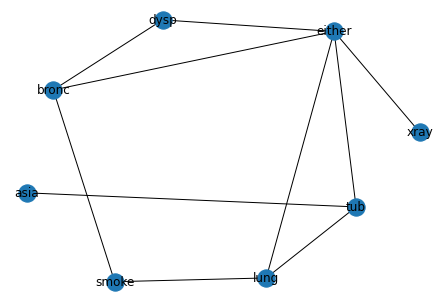

In [13]:
import networkx as nx
from matplotlib import pyplot as plt

moral_graph = bayesianModel.to_markov_model()
nx.draw(moral_graph, with_labels=True)

The triangular graph is given below

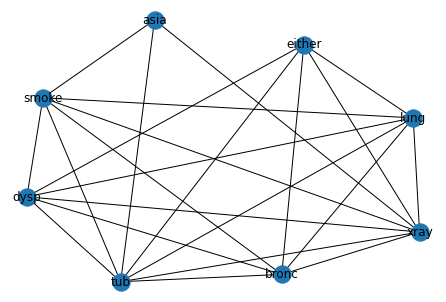

In [14]:
triangular_graph = moral_graph.triangulate()
nx.draw(triangular_graph, with_labels=True)

The junction tree is given below

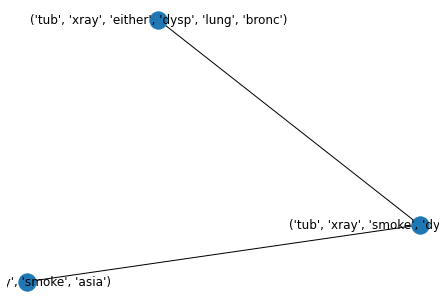

In [15]:
junction_tree = triangular_graph.to_junction_tree()
nx.draw(junction_tree, with_labels=True)

In [16]:
junction_tree.nodes()

NodeView((('tub', 'xray', 'either', 'dysp', 'lung', 'bronc'), ('tub', 'xray', 'smoke', 'dysp', 'lung', 'bronc'), ('tub', 'xray', 'smoke', 'asia')))

The "running intersection property" is satisfied by the junction tree constructed above as for each pair of clusters C1 and C2 that contain i, each cluster on the unique path between C1 and C2 also contains i.

The 3 images in the next 3 cells contain the answer for Problem 2 in order

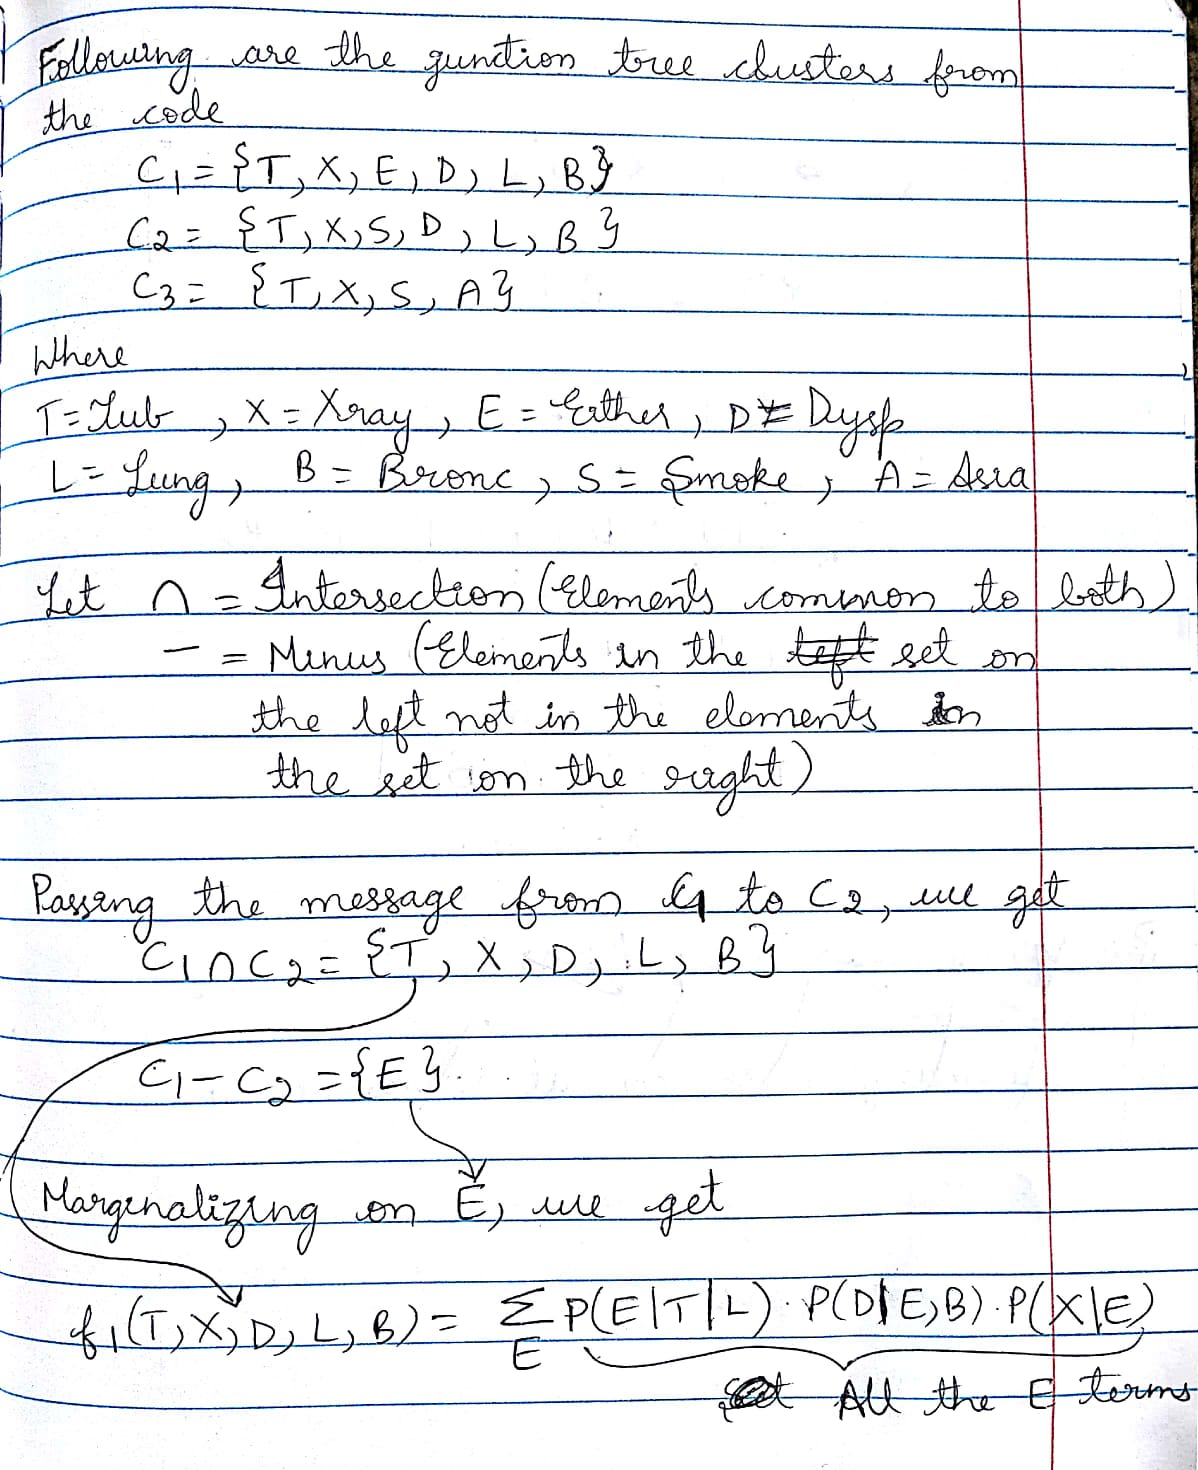

In [27]:
from IPython.display import Image

Image(filename='/content/drive/My Drive/Problem2-1.jpeg')

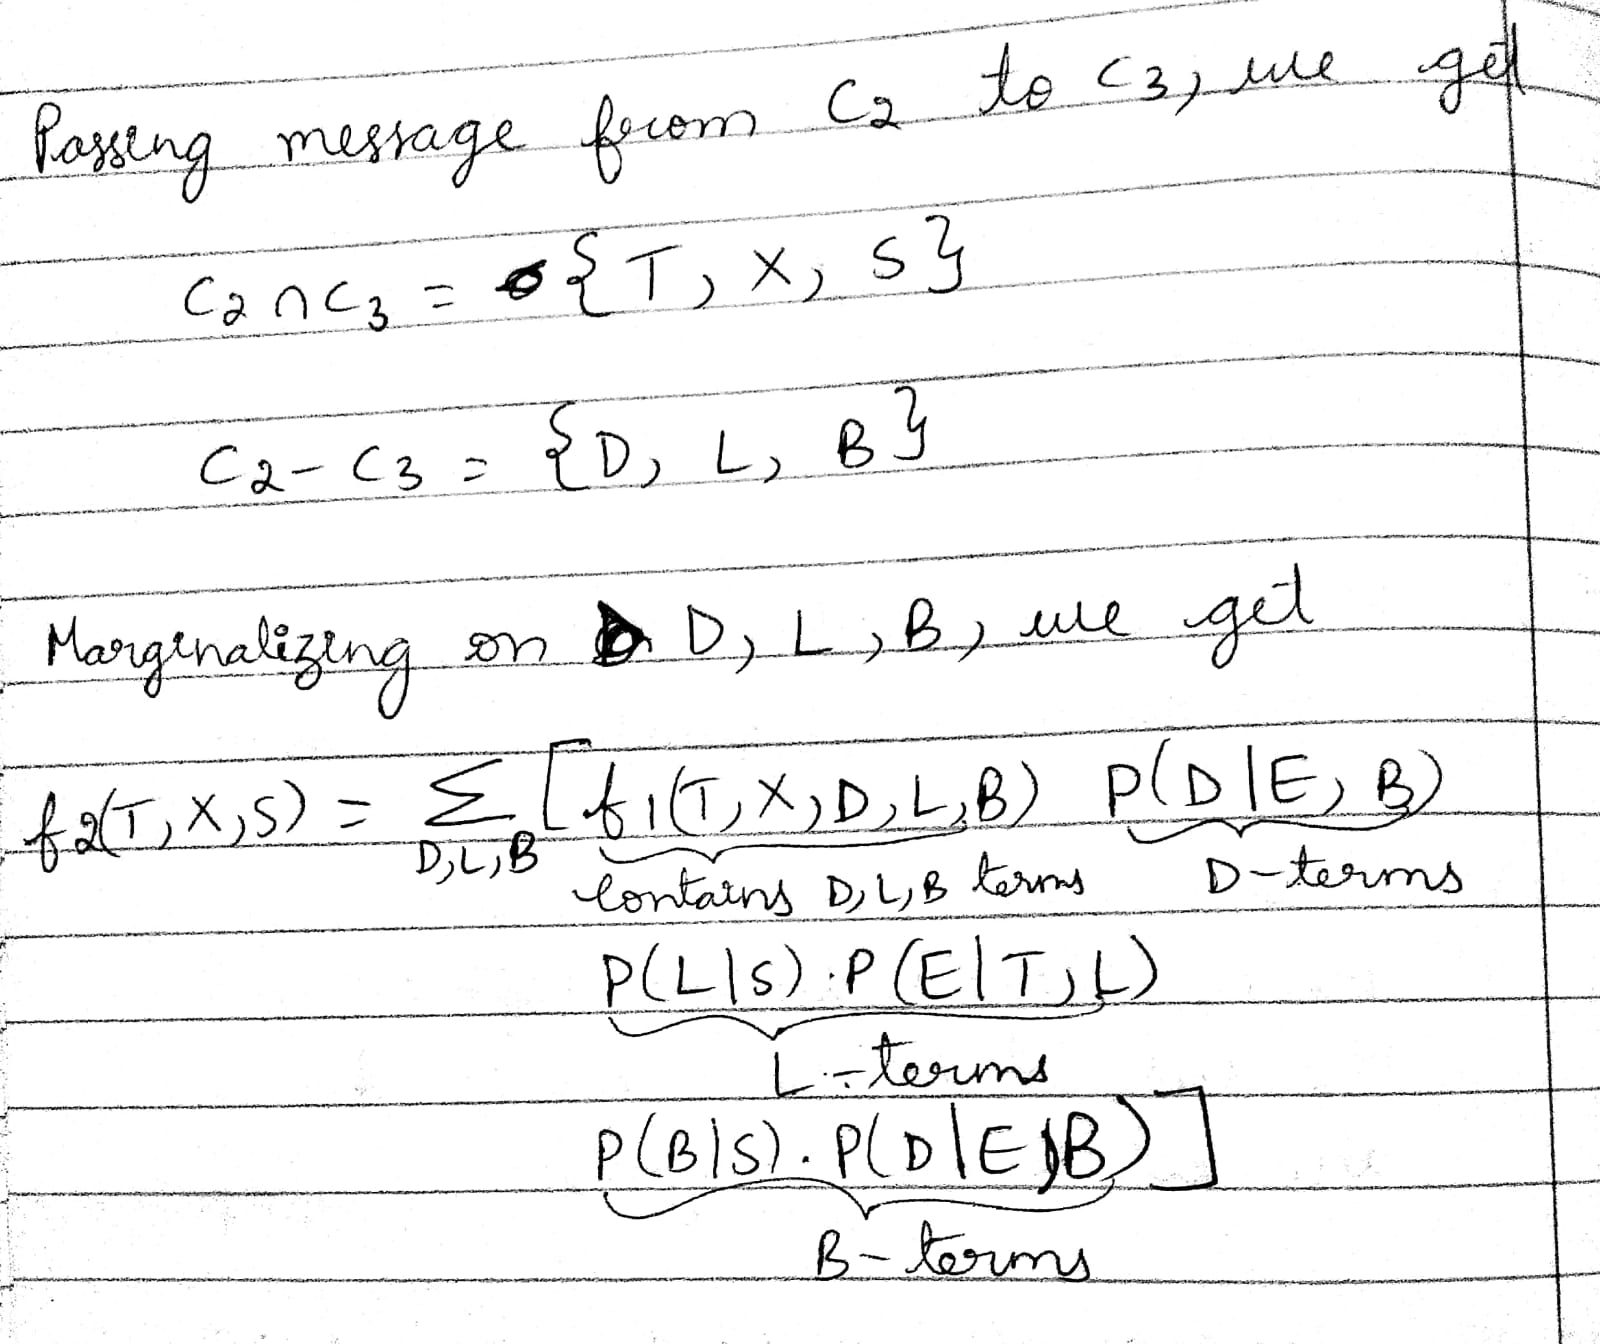

In [28]:
Image(filename='/content/drive/My Drive/Problem2-2.jpeg')

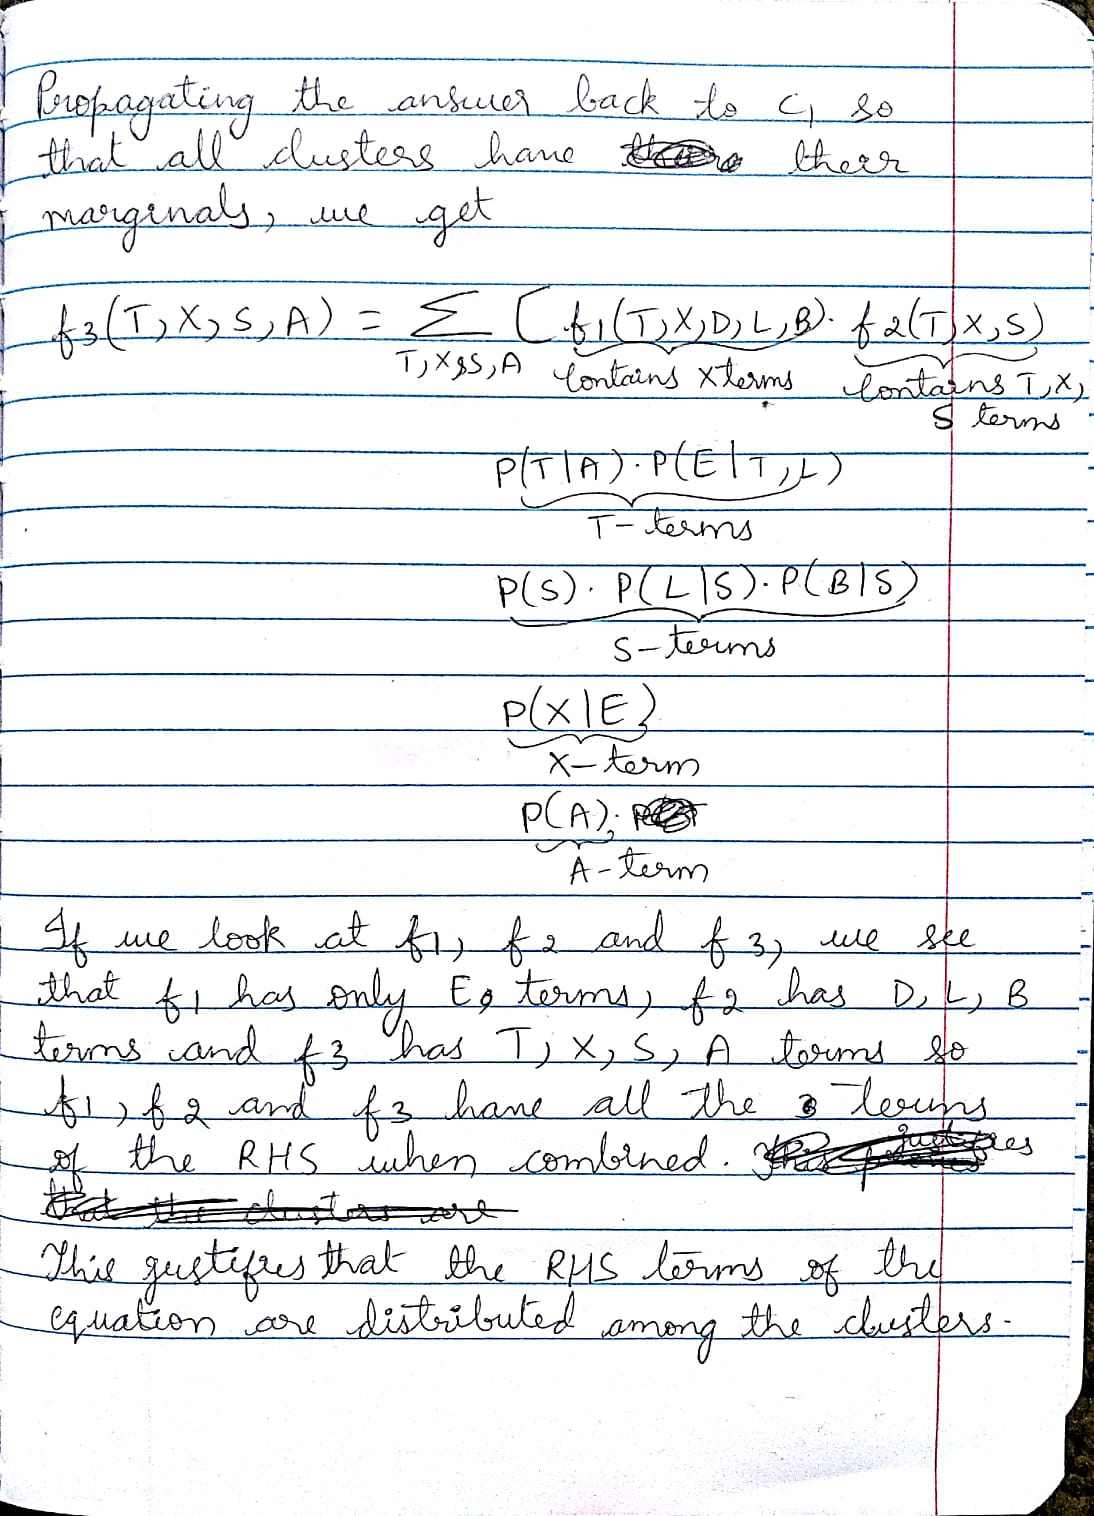

In [29]:
Image(filename='/content/drive/My Drive/Problem2-3.jpeg')